# Data Exploration
* Auto-Correlation Function plot
* Partial Auto-Correlation Function plot
* Time-Series Line Graph of all columns
* Seasonal Distribution of Malaysia GDP QoQ Growth
* Stationarity Testing

In [2]:
pip install matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/8.1 MB 11.8 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 11.9 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 11.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 11.4 MB/s eta 0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ----------- ---------------------------- 2/7 [fonttools]
   ----------- ---------------------------- 2/7 [fonttools]
   ----------- ---------------------------- 2/7 [fonttools]
   ----------- ---------------------------- 2/7 [fonttools]
   ----------- ---------------------------- 2/7 [fonttools]
   ----------- ----------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_combined = pd.read_csv(("MergedData.csv"), index_col=0)
df_combined.index = pd.to_datetime(df_combined.index) # Ensure in datetime format
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 1997-03-31 to 2025-03-31
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sg_gdp          113 non-null    float64
 1   hk_gdp_growth   113 non-null    float64
 2   us_gdp_growth   113 non-null    float64
 3   sti_close       113 non-null    float64
 4   sg_cpi          113 non-null    float64
 5   iip             113 non-null    float64
 6   rsi             113 non-null    float64
 7   total_tourists  113 non-null    float64
 8   total_nodx      113 non-null    float64
dtypes: float64(9)
memory usage: 8.8 KB


## **Time-Series Line Graph**

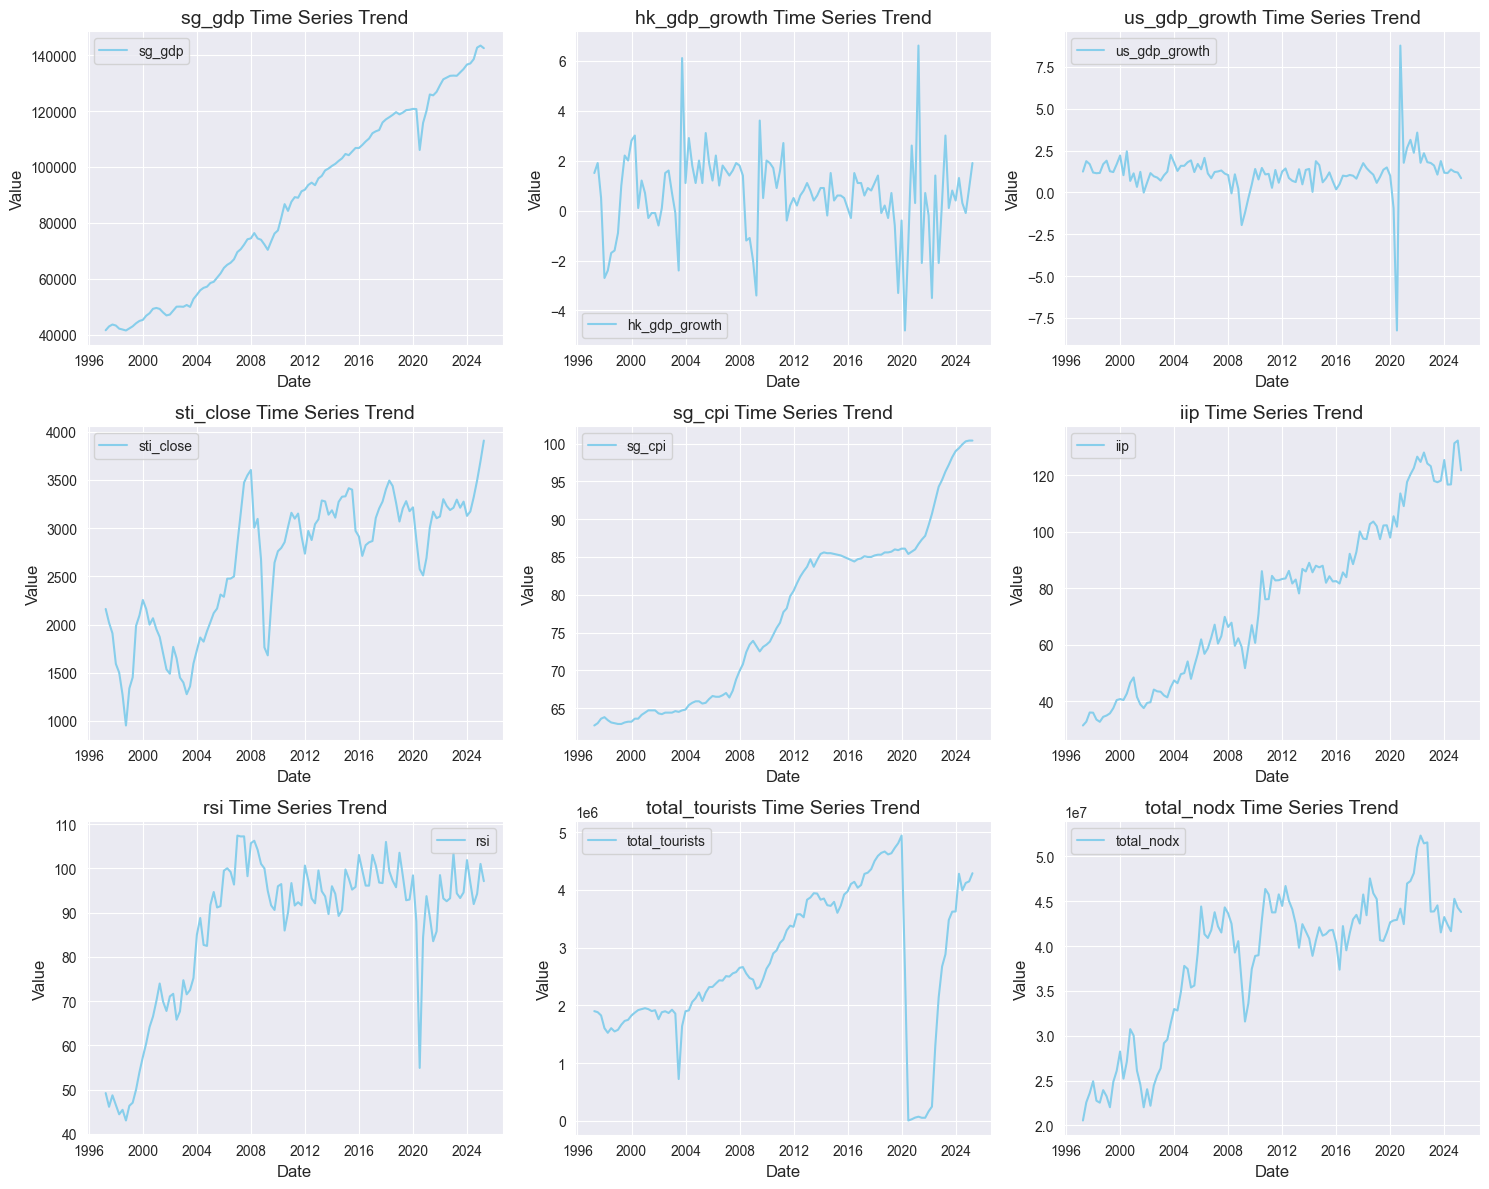

In [5]:
# Set a style for better aesthetics
sns.set_style("darkgrid")

# Create a figure to hold multiple subplots
num_features = df_combined.shape[1]
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
axes = axes.flatten()

# Iterate through each column and create a time series plot
for i, column in enumerate(df_combined.columns):
    ax = axes[i]
    ax.plot(df_combined.index, df_combined[column], label=column, color='skyblue')
    ax.set_title(f'{column} Time Series Trend', fontsize=14)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **Outlier Detection**
* No outlie values seems to be detected in the boxplot.

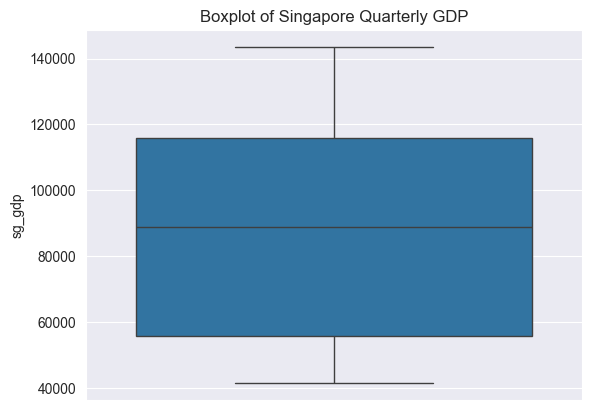

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df_combined['sg_gdp'].dropna())
plt.title("Boxplot of Singapore Quarterly GDP")
plt.show()

## **Seasonal Distribution of Singapore GDP Quarterly Growth**
* The growth of the GDP is observed to be inclining slowly over the quarter, indicating a slow yet steaddy growth.
* A significant outlier is observed in years 2020, possibly due to the effect of Covid pandemic.

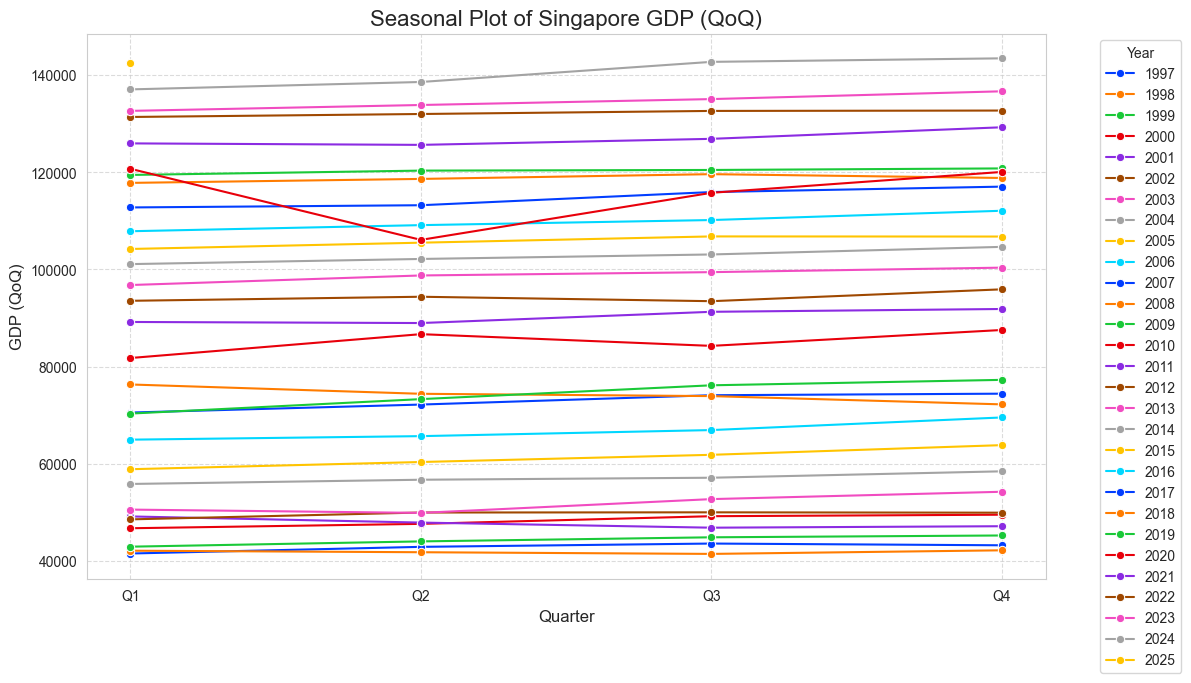

In [7]:
df_combined['year'] = df_combined.index.year
df_combined['quarter'] = df_combined.index.quarter

# Set a style for better aesthetics
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))
sns.lineplot(
    data= df_combined,
    x='quarter',
    y='sg_gdp',
    hue='year',
    marker='o', 
    palette='bright'
)

plt.title('Seasonal Plot of Singapore GDP (QoQ)', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('GDP (QoQ)', fontsize=12)
plt.xticks(ticks=[1, 2, 3, 4], labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Seasonal Decomposition of Singapore GDP Quarterly Growth
- Contains insights into General Trend, Seasonal, and the Residual component.
- Can use either multiplicative (many changes over years/ no negative or zero values) or additive (predictable changes in constant range) model.

* **TREND:** A repeating pattern of small increments and dips can be observed throughout the graph. Large dip across Q1 and Q2 of 2020, followed by sharp incline (likely due to COVID pandemic).

* **SEASONAL:** Very strong and unwavering pattern across all the years, makes the GDP quite predictable in an average year.

* **RESIDUAL:** Reflects the noise left after filtering out Trend + Seasonality. Based on plot, the points are plotted around the center linee, suggesting most of patterns have been captured, except for the outliers from Covid-19 pandemic

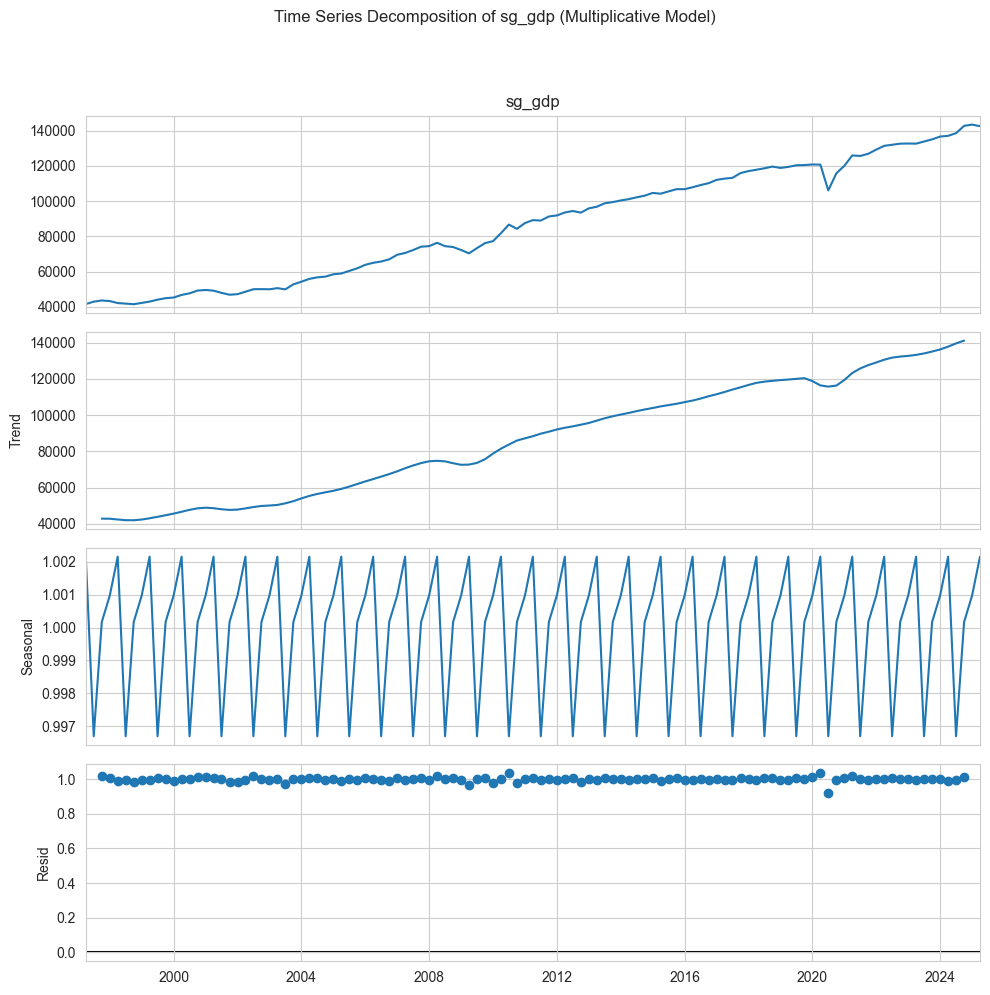

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
target_variable = 'sg_gdp' # Specify the target variable for decomposition
decomposition = seasonal_decompose(df_combined[target_variable], model='multiplicative', period=4) # 4 quarters, so period = 4

sns.set_style("whitegrid")
fig = decomposition.plot()
fig.set_size_inches(10, 10) 
fig.suptitle(f'Time Series Decomposition of {target_variable} (Multiplicative Model)', y=1.02) 
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

## **Stationary Testing via Augmented Dickey-Fuller Test**
To analyze whether the time-series data is stationary or not stationary.
NULL HYPOTHESIS: The time-series data is not stationary.

* *ADF Statistic* = Higher than critical value threshold of 1%. Shows that the null hypothesis is accepted and the data is not stationary.

* *p-value* = Reject the null hypothesis if lower than 0.05 (accept if higher than 0.05)

* *Critical Values* = Benchmarks to indicate stationarity at different levels (99%, 95%, 90%)

**CONCLUSION :** Null Hypothesis is accepted. Differencing should be applied.

In [9]:
from statsmodels.tsa.stattools import adfuller

target_variable = 'sg_gdp'  # Specify the target variable for ADF test
adf_result = adfuller(df_combined[target_variable], regression='c')

# Extract and print the results
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.343372
p-value: 0.979249
Critical Values:
	1%: -3.490
	5%: -2.888
	10%: -2.581


### Check the stationary of all the feature variables
* Only the RSI, US GDP Growth, and Hong Kong GDP Growth is stationary

In [24]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Initialize list to hold results
adf_results = []

# Iterate over each column
for col in df_combined.select_dtypes(include='number').columns:
    series = df_combined[col].dropna()
    
    result = adfuller(series, autolag='AIC')
    
    adf_stat = result[0]
    p_value = result[1]
    crit_values = result[4]
    
    is_stationary = 'Yes' if p_value < 0.05 else 'No'
    
    adf_results.append({
        'Variable': col,
        'ADF Statistic': adf_stat,
        'p-value': p_value,
        '1% Critical Value': crit_values['1%'],
        '5% Critical Value': crit_values['5%'],
        '10% Critical Value': crit_values['10%'],
        'Stationary (5%)': is_stationary
    })

# Convert to DataFrame
adf_summary_df = pd.DataFrame(adf_results)

# Display summary
adf_summary_df

,Variable,ADF Statistic,p-value,1% Critical Value,5% Critical Value,10% Critical Value,Stationary (5%)
0,sg_gdp,0.343372,9.792492e-01,-3.490131,-2.887712,-2.580730,No
1,hk_gdp_growth,-4.844496,4.467172e-05,-3.492401,-2.888697,-2.581255,Yes
2,us_gdp_growth,-11.277435,1.484573e-20,-3.490131,-2.887712,-2.580730,Yes
3,sti_close,-1.896588,3.336679e-01,-3.490683,-2.887952,-2.580857,No
4,sg_cpi,0.443751,9.830594e-01,-3.491245,-2.888195,-2.580988,No
5,iip,-0.004751,9.581374e-01,-3.494220,-2.889485,-2.581676,No
6,rsi,-3.090215,2.728583e-02,-3.496149,-2.890321,-2.582122,Yes
7,total_tourists,-2.493040,1.171770e-01,-3.490683,-2.887952,-2.580857,No
8,total_nodx,-2.220289,1.989642e-01,-3.490131,-2.887712,-2.580730,No


### Differencing Features and Auto-Stationarity Check
* Iterative function to apply non-seasonal and seasonal differencing where required for all feature columns.
* Differencing for target variable 'sg_gdp' will be done during the model building itself.
* Uses the Augmented Dicky Fuller test to check the stationarity of features.

In [31]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np

def get_differencing_order(series, alpha=0.05, max_diffs=2, seasonal_period=None, max_seasonal_diffs=1):
    """
    Returns (d, D) with debug output. Prints ADF test results for each step.
    """
    current_series = series.copy()
    d, D = 0, 0
    original_p = adfuller(current_series.dropna(), autolag='AIC')[1]
    
    print(f"\n--- Testing: {series.name} ---")
    print(f"  Initial ADF p-value: {original_p:.4f} (Alpha: {alpha})")
    
    # Early exit if already stationary
    if original_p < alpha:
        print("STATIONARY: No differencing needed.")
        return (0, 0)
    else:
        print("NOT STATIONARY: Proceeding with differencing.")
    
    # Non-seasonal differencing (d)
    for i in range(1, max_diffs + 1):
        temp_series = current_series.diff().dropna()
        if len(temp_series) < 5:
            print(f"DIFFERENCING FAILED: Series too short after {i} non-seasonal diffs.")
            return (-1, -1)
        
        p_value = adfuller(temp_series, autolag='AIC')[1]
        print(f"After {i} non-seasonal diff(s), p-value: {p_value:.4f}")
        
        if p_value < alpha:
            d = i
            print(f"->  STATIONARY ACHIEVED: Stationarity with d={d}.")
            break
        else:
            current_series = temp_series
    
    # Seasonal differencing (D)
    if seasonal_period is not None and d != -1:
        seasonal_series = series.copy()  
        seasonal_p = adfuller(seasonal_series.dropna(), autolag='AIC')[1]
        
        if seasonal_p < alpha:
            print("->  SEASONAL STATIONARY: No seasonal differencing needed.")
        else:
            for j in range(1, max_seasonal_diffs + 1):
                temp_series = seasonal_series.diff(seasonal_period).dropna()
                if len(temp_series) < 5:
                    print(f"SEASONAL DIFFERENCING FAILED: Series too short after {j} seasonal diffs.")
                    return (d, -1)
                
                p_value = adfuller(temp_series, autolag='AIC')[1]
                print(f"-> After {j} seasonal diff(s), p-value: {p_value:.4f}")
                
                if p_value < alpha:
                    D = j
                    print(f"sEASONAL ACHIEVED: Stationarity with D={D}.")
                    break
                else:
                    seasonal_series = temp_series
    
    return (d, D)

# Parameters
TARGET_VAR = 'sg_gdp'      # Skip differencing for target variable. Will be done with SARIMAX parameters
SEASONAL_PERIOD = 4        # 4 quarters
ALPHA = 0.05               # p-value for threshold

df_differenced = pd.DataFrame(index=df_combined.index)
df_differenced[TARGET_VAR] = df_combined[TARGET_VAR]
differencing_orders = {}

print("\n=== Starting Differencing with ADF Diagnostics ===")

for col in df_combined.select_dtypes(include=np.number).columns:
    if col == TARGET_VAR:
        continue
    
    d, D = get_differencing_order(
        df_combined[col].rename(col), 
        alpha=ALPHA, 
        seasonal_period=SEASONAL_PERIOD
    )
    
    if d == -1:
        print(f"Could not determine differencing order for {col}. Skipping.")
        continue
    
    # Apply differencing if needed
    differenced_series = df_combined[col].copy()
    for _ in range(d):
        differenced_series = differenced_series.diff()
    for _ in range(D):
        differenced_series = differenced_series.diff(SEASONAL_PERIOD)
    
    df_differenced[col] = differenced_series.dropna()
    differencing_orders[col] = (d, D) if SEASONAL_PERIOD else d

# Summary
print("\n--- Differencing Orders ---")
for col, order in differencing_orders.items():
    print(f"  {col}: {order}")


=== Starting Differencing with ADF Diagnostics ===

--- Testing: hk_gdp_growth ---
  Initial ADF p-value: 0.0000 (Alpha: 0.05)
STATIONARY: No differencing needed.

--- Testing: us_gdp_growth ---
  Initial ADF p-value: 0.0000 (Alpha: 0.05)
STATIONARY: No differencing needed.

--- Testing: sti_close ---
  Initial ADF p-value: 0.3337 (Alpha: 0.05)
NOT STATIONARY: Proceeding with differencing.
After 1 non-seasonal diff(s), p-value: 0.0000
->  STATIONARY ACHIEVED: Stationarity with d=1.
-> After 1 seasonal diff(s), p-value: 0.0015
sEASONAL ACHIEVED: Stationarity with D=1.

--- Testing: sg_cpi ---
  Initial ADF p-value: 0.9831 (Alpha: 0.05)
NOT STATIONARY: Proceeding with differencing.
After 1 non-seasonal diff(s), p-value: 0.0022
->  STATIONARY ACHIEVED: Stationarity with d=1.
-> After 1 seasonal diff(s), p-value: 0.0335
sEASONAL ACHIEVED: Stationarity with D=1.

--- Testing: iip ---
  Initial ADF p-value: 0.9581 (Alpha: 0.05)
NOT STATIONARY: Proceeding with differencing.
After 1 non-seaso

In [32]:
df_differenced.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 1997-03-31 to 2025-03-31
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sg_gdp          113 non-null    float64
 1   hk_gdp_growth   113 non-null    float64
 2   us_gdp_growth   113 non-null    float64
 3   sti_close       108 non-null    float64
 4   sg_cpi          108 non-null    float64
 5   iip             108 non-null    float64
 6   rsi             113 non-null    float64
 7   total_tourists  112 non-null    float64
 8   total_nodx      108 non-null    float64
dtypes: float64(9)
memory usage: 8.8 KB


In [33]:
# Drop rows that contain any missing values
df_differenced = df_differenced.dropna(axis=0, how='any')
print(df_differenced.info())
print("===========================")
print(df_differenced.head())
df_differenced.to_csv("ModellingData.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 1998-06-30 to 2025-03-31
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sg_gdp          108 non-null    float64
 1   hk_gdp_growth   108 non-null    float64
 2   us_gdp_growth   108 non-null    float64
 3   sti_close       108 non-null    float64
 4   sg_cpi          108 non-null    float64
 5   iip             108 non-null    float64
 6   rsi             108 non-null    float64
 7   total_tourists  108 non-null    float64
 8   total_nodx      108 non-null    float64
dtypes: float64(9)
memory usage: 8.4 KB
None
             sg_gdp  hk_gdp_growth  us_gdp_growth   sti_close  sg_cpi  \
date                                                                    
1998-06-30  41830.6           -1.7        1.16415  -87.369995    -0.6   
1998-09-30  41485.7           -1.6        1.68788 -208.103333    -0.7   
1998-12-31  42225.7           -0.9        1.8

### **Autocorrelation Function (ACF) & Partial Autocorrelation Function (PACF)**
* From first sight of ACF plots of Malaysia GDP after non-seasonal differencing, a seasonal component can still be observed.
* Suggests a need for seasonal differencing

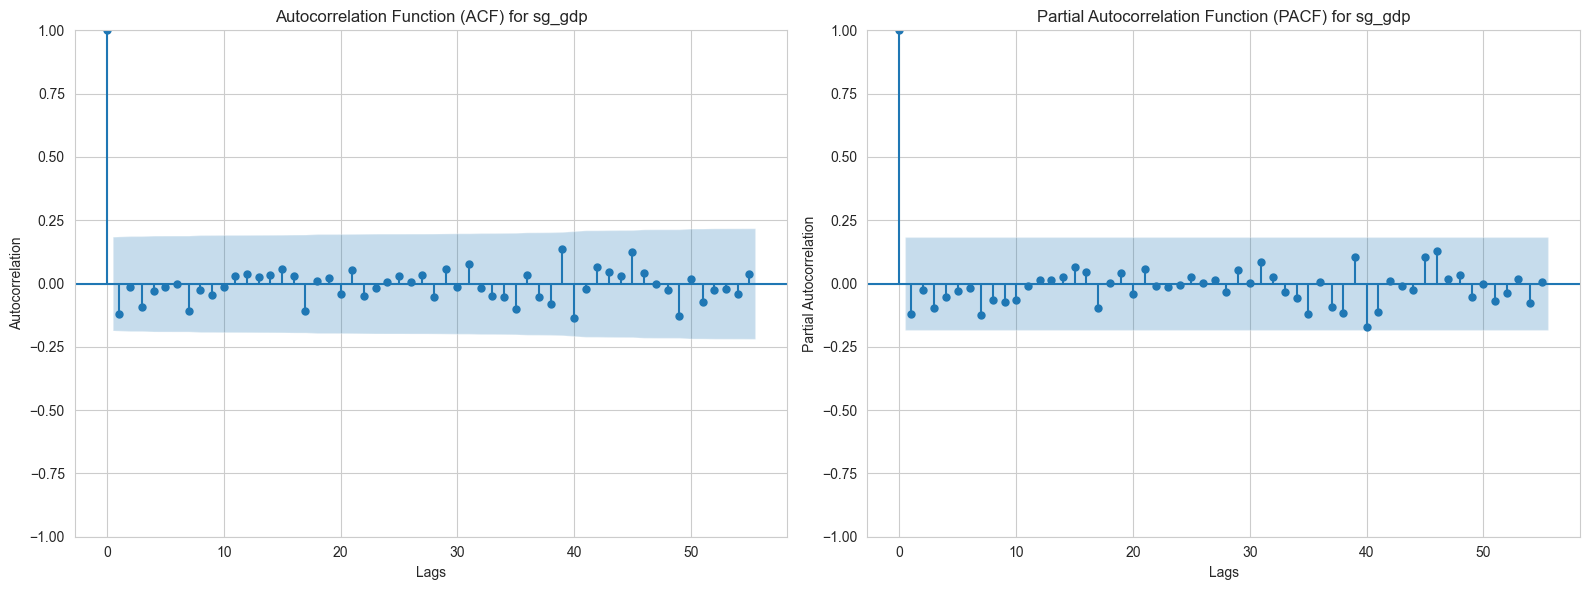

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set_style("whitegrid") 

target_variable = 'sg_gdp' # Specify the target variable

# Determine the number of lags. For quarterly data, 20 lags represents 5 years.
# Ensure lags are not more than len(data) / 2
n_lags = min(112, len(df_differenced) // 2 - 1)

# Create a figure with two subplots for ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot ACF
plot_acf(df_differenced[target_variable], lags=n_lags, ax=axes[0], title=f'Autocorrelation Function (ACF) for {target_variable}')
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('Autocorrelation')
axes[0].grid(True)

# Plot PACF
plot_pacf(df_differenced[target_variable], lags=n_lags, ax=axes[1], title=f'Partial Autocorrelation Function (PACF) for {target_variable}')
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('Partial Autocorrelation')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### **Seasonal Differencing for Singapore GDP**

In [22]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Define the seasonal period (4 for quarterly data)
SEASONAL_PERIOD = 4

# --- Extract the already non-seasonally differenced Singapore GDP series ---
# This is the 'gdp_first_diff' from our previous conceptual step.
sg_gdp_non_seasonal_diff = df_differenced['sg_gdp'].copy()

print("\n--- Applying Seasonal Differencing to Singapore_GDP ---")

# This takes the non-seasonally differenced GDP and applies a seasonal difference.
sg_gdp_fully_differenced = sg_gdp_non_seasonal_diff.diff(periods=SEASONAL_PERIOD).dropna()

# --- Perform ADF Test on the Seasonally Differenced Series ---
print(f"\n===== ADF Test Results for Seasonally Differenced Singapore_GDP =====")
result_adf = adfuller(sg_gdp_fully_differenced.dropna()) # Ensure no NaNs before test

print(f"ADF Statistic: {result_adf[0]:.2f}")
print(f"P-value: {result_adf[1]:.3f}")
print(f"Critical Values:")
for key, value in result_adf[4].items():
    print(f"  {key}: {value:.3f}")

sg_gdp_fully_differenced


--- Applying Seasonal Differencing to Singapore_GDP ---

===== ADF Test Results for Seasonally Differenced Singapore_GDP =====
ADF Statistic: -5.82
P-value: 0.000
Critical Values:
  1%: -3.500
  5%: -2.892
  10%: -2.583


date
1998-06-30   -1684.0
1998-09-30   -1023.1
1998-12-31    1096.6
1999-03-31    1861.8
1999-06-30    1399.8
               ...  
2024-03-31     458.2
2024-06-30     316.0
2024-09-30    2922.8
2024-12-31    -876.2
2025-03-31   -1320.6
Name: sg_gdp, Length: 108, dtype: float64

### **ACF/PACF Plots for Seasonally Differenced Singapore GDP**
* Seasonal component seem to be removed, with decay levels being observed.

***PACF Plot :***
* p (Auto-Regressive) = 0 -> NONE
* P (Seasonal AR) = 3 -> Large spikes as seasonal lags 4, 8, 12.

***ACF Plot :***
* q (Moving Average) = 0 -> Large spikes at non-seasonal lags -> NONE
* Q (Seasonal MA) = 1 -> Large spikes at seasonal lags (Lag 4,8,12,16) -> Only found at lag 4

* d (Non-Seasonal Differencing) = 1 
* D (Seasonal Differencing) = 1
* s (Seasonality) = 4 -> Q1 to Q4 of a year


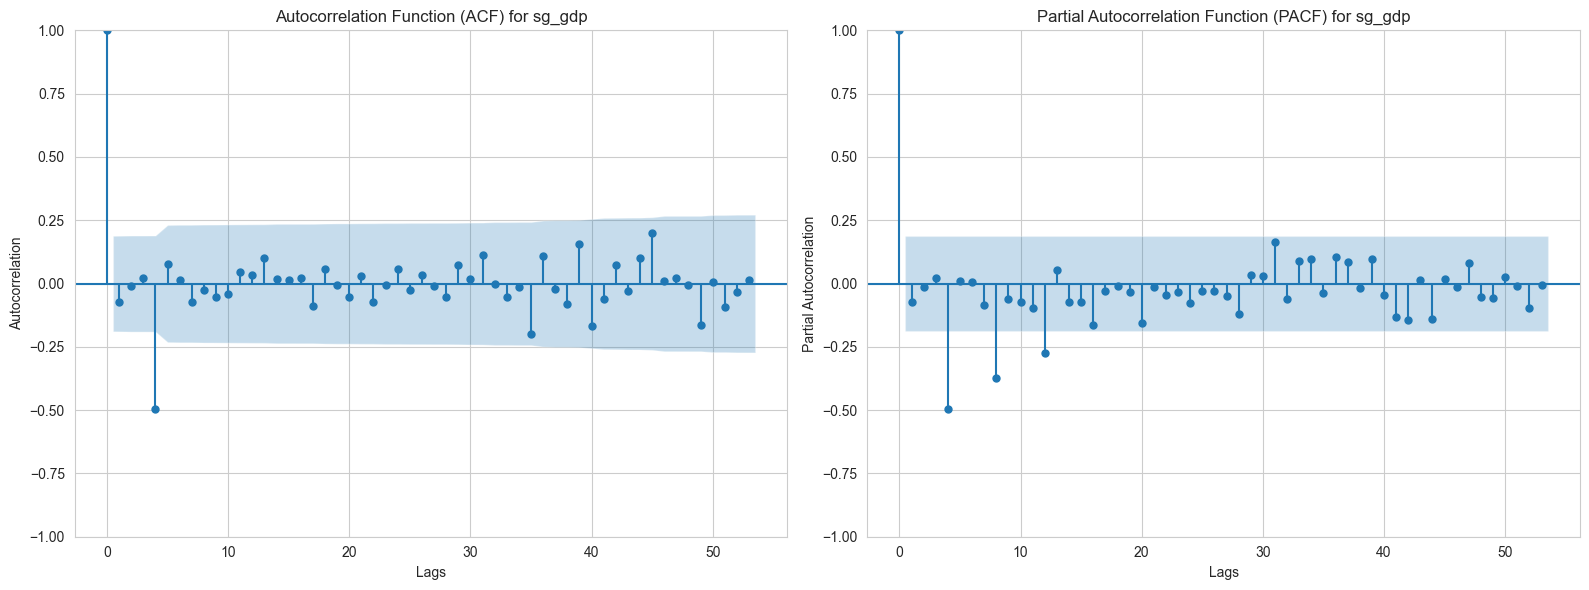

In [23]:
# Ensure lags are not more than len(data) / 2
n_lags = min(112, len(sg_gdp_fully_differenced) // 2 - 1)

# Create a figure with two subplots for ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot ACF
plot_acf(sg_gdp_fully_differenced, lags=n_lags, ax=axes[0], title=f'Autocorrelation Function (ACF) for {target_variable}')
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('Autocorrelation')
axes[0].grid(True)

# Plot PACF
plot_pacf(sg_gdp_fully_differenced, lags=n_lags, ax=axes[1], title=f'Partial Autocorrelation Function (PACF) for {target_variable}')
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('Partial Autocorrelation')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Merging Differenced Malaysia GDP into dataset

In [16]:
import pandas as pd

df_sarimax_data = df_differenced.copy()

# Replace the Malaysia_GDP column with the fully differenced version ---
df_sarimax_data['sg_gdp'] = sg_gdp_fully_differenced

# Drop rows with NaN values (due to differencing)
initial_rows_count = df_sarimax_data.shape[0]
df_finalData = df_sarimax_data.dropna()
rows_removed = initial_rows_count - df_finalData.shape[0]

print(f"Original number of rows in the combined data: {initial_rows_count}")
print(f"Number of rows removed due to NaNs from differencing: {rows_removed}")
print(f"Final shape of the DataFrame for SARIMAX: {df_finalData.shape}")
print("\nFirst 5 rows of the prepared SARIMAX DataFrame:")
df_finalData

Original number of rows in the combined data: 112
Number of rows removed due to NaNs from differencing: 4
Final shape of the DataFrame for SARIMAX: (108, 9)

First 5 rows of the prepared SARIMAX DataFrame:


,sg_gdp,hk_gdp_growth,us_gdp_growth,sti_close,sg_cpi,iip,rsi,total_tourists,total_nodx
date,,,,,,,,,
1998-06-30,-1684.0,-1.7,1.16415,-229.836629,-0.3,-0.800000,45.438,80173.0,-221858.0
1998-09-30,-1023.1,-1.6,1.68788,-318.236715,-0.1,1.766667,43.028,-56299.0,1400323.0
1998-12-31,1096.6,-0.9,1.89554,384.540019,-0.1,0.466667,46.338,28431.0,-690682.0
1999-03-31,1861.8,1.0,1.26631,114.820028,0.0,0.766667,47.041,87615.0,-1217636.0
1999-06-30,1399.8,2.2,1.21687,533.129924,0.2,1.833333,49.984,66551.0,2826349.0
...,...,...,...,...,...,...,...,...,...
2024-03-31,458.2,1.3,1.15596,45.956706,0.4,-8.700000,96.721,653193.0,-849745.5
2024-06-30,316.0,0.3,1.37173,147.736654,0.5,0.066667,91.913,-286152.0,-725938.9
2024-09-30,2922.8,-0.1,1.23446,174.026611,0.4,14.600000,94.232,127520.0,3614409.7


In [17]:

df_finalData.to_csv("ModellingData.csv", index=True)
df_finalData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 1998-06-30 to 2025-03-31
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sg_gdp          108 non-null    float64
 1   hk_gdp_growth   108 non-null    float64
 2   us_gdp_growth   108 non-null    float64
 3   sti_close       108 non-null    float64
 4   sg_cpi          108 non-null    float64
 5   iip             108 non-null    float64
 6   rsi             108 non-null    float64
 7   total_tourists  108 non-null    float64
 8   total_nodx      108 non-null    float64
dtypes: float64(9)
memory usage: 8.4 KB


## **Correlation Matrix**

Original Dataset (before Differencing)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 1997-03-31 to 2025-03-31
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sg_gdp          113 non-null    float64
 1   hk_gdp_growth   113 non-null    float64
 2   us_gdp_growth   113 non-null    float64
 3   sti_close       113 non-null    float64
 4   sg_cpi          113 non-null    float64
 5   iip             113 non-null    float64
 6   rsi             113 non-null    float64
 7   total_tourists  113 non-null    float64
 8   total_nodx      113 non-null    float64
dtypes: float64(9)
memory usage: 8.8 KB


C:\Users\Travi\AppData\Local\Temp\ipykernel_174228\1847777362.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_target.values, y= correlations_with_target.index, palette='viridis')


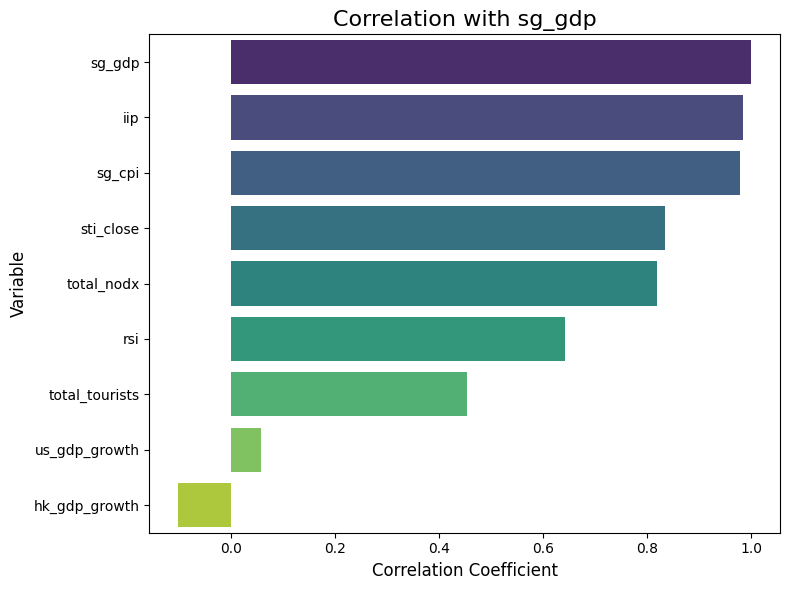

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

target_variable = 'sg_gdp'
df_reg = pd.read_csv(r"D:\PyTorch Projects\Malaysia_GDP\Code\MergedData.csv", index_col=0)
df_reg.index = pd.to_datetime(df_reg.index)  # Ensure index is datetime
df_reg.info()

# Calculate correlations of all columns with the target variable
correlations_with_target = df_reg.corr()[target_variable].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations_with_target.values, y= correlations_with_target.index, palette='viridis')
plt.title(f'Correlation with {target_variable}', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.tight_layout()
plt.show()

**Differenced Dataset (after Differencing)**

C:\Users\Travi\AppData\Local\Temp\ipykernel_400180\4217571908.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_target.values, y=correlations_with_target.index, palette='viridis')


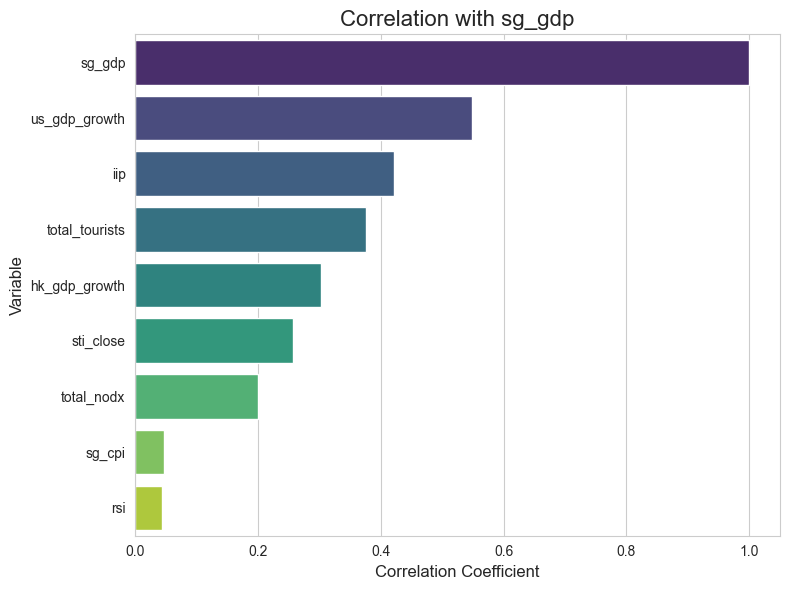

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

target_variable = 'sg_gdp'

# Calculate correlations of all columns with the target variable
correlations_with_target = df_finalData.corr()[target_variable].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=correlations_with_target.values, y=correlations_with_target.index, palette='viridis')
plt.title(f'Correlation with {target_variable}', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.tight_layout()
plt.show()

## Granger's Causality Test
* Non-Oil Domestic Products and Retail Sales Index provides insignificant contribution to Singapore GDP's trends

In [24]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

def grangers_causality_matrix(data, target, maxlag=4, test='ssr_chi2test', verbose=False):

    variables = data.columns
    results = {}
    
    for col in variables:
        if col == target:
            continue
        test_data = data[[target, col]].dropna()
        try:
            test_result = grangercausalitytests(test_data, maxlag=maxlag)
            p_values = [round(test_result[i+1][0][test][1], 4) for i in range(maxlag)]
            min_p = np.min(p_values)
            results[col] = min_p
        except Exception as e:
            results[col] = None
            print(f"Skipped {col} due to error: {e}")
    
    result_df = pd.DataFrame.from_dict(results, orient='index', columns=['min_p_value'])
    result_df = result_df.sort_values(by='min_p_value')
    return result_df

# Example usage
granger_results = grangers_causality_matrix(df_finalData, target='sg_gdp', maxlag=4)
print(granger_results)

significant = granger_results[granger_results['min_p_value'] < 0.05]
print("\nSignificant Granger-Causal Features:")
print(significant)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=17.5032 , p=0.0001  , df_denom=104, df_num=1
ssr based chi2 test:   chi2=18.0081 , p=0.0000  , df=1
likelihood ratio test: chi2=16.6439 , p=0.0000  , df=1
parameter F test:         F=17.5032 , p=0.0001  , df_denom=104, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=10.3257 , p=0.0001  , df_denom=101, df_num=2
ssr based chi2 test:   chi2=21.6738 , p=0.0000  , df=2
likelihood ratio test: chi2=19.7202 , p=0.0001  , df=2
parameter F test:         F=10.3257 , p=0.0001  , df_denom=101, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.2133  , p=0.0002  , df_denom=98, df_num=3
ssr based chi2 test:   chi2=23.1857 , p=0.0000  , df=3
likelihood ratio test: chi2=20.9495 , p=0.0001  , df=3
parameter F test:         F=7.2133  , p=0.0002  , df_denom=98, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.5463  , p=0.0001  , 